This jupyter notebook provides the necessary code for performing the following analysis: First, a set of manually validated interactions (741) that has been recently added to DrugBank is selected. From this 741, 10 interactions are isolated from any evaluated dataset, and the remaining are connected to existing nodes (drug or protein). Then, the Moltrans model is selected to train on every dataset and test on this 741 new interactions.

**About Moltrans code:**

Note that moltrans_predictions.py is a modified version of the original train.py script, adapted test on an specific set of interactions. This modified script can be found in the data/ directory for completeness. The MolTrans code is fully available in their own GitHub repository [https://github.com/kexinhuang12345/MolTrans](https://github.com/kexinhuang12345/MolTrans).

For example, to run Yamanishi_nr dataset with seed 0, you should run the code below in the same folder you cloned the moltrans repo.

```$ nohup python3 -u moltrans_predictions.py -s 0 -d Yamanishi_nr > predictions/logs/log_nr_seed0.out & ```

**About GeNNius code:**

Note that gennius_prediction.py is a modified version of the original main.py script from GeNNius, adapted test on an specific set of interactions.
In this case, the arguments (datset and seed) are not parser and should be modified inside the script. 
This modified script can be found in the data/ directory for completeness. 
The GitHub code is fully available in the GitHub repository [https://github.com/ML4BM-Lab/GeNNius](https://github.com/ML4BM-Lab/GeNNius).

```nohup python3 -u Code/gennius_prediction.py > Results/logs/log_dataset_seed.out &```

The pickle ```new_test.pkl`` contains information about the selected interactions when comparing the versions 5.1.9 (used in the manuscript) and 5.1.12 (newer version) of DTIs available in DrugBank database.

In [3]:
import pandas as pd

df_info = pd.read_pickle('./data/new_test.pkl')

df_info[['Drug', 'Protein', 'Old_drug', 'Old_protein']].head(4)

,Drug,Protein,Old_drug,Old_protein
0,DB00114,Q05329,True,True
1,DB00156,Q47066,True,True
2,DB00159,P09917,True,True
3,DB00179,Q96QT4,True,True


The chunk of code below plots a barplot of model performance for predicting new interactions. 
It employs two pickles that already contain the mean and the standar deviation (located in data folder) of both models for each DTI dataset.

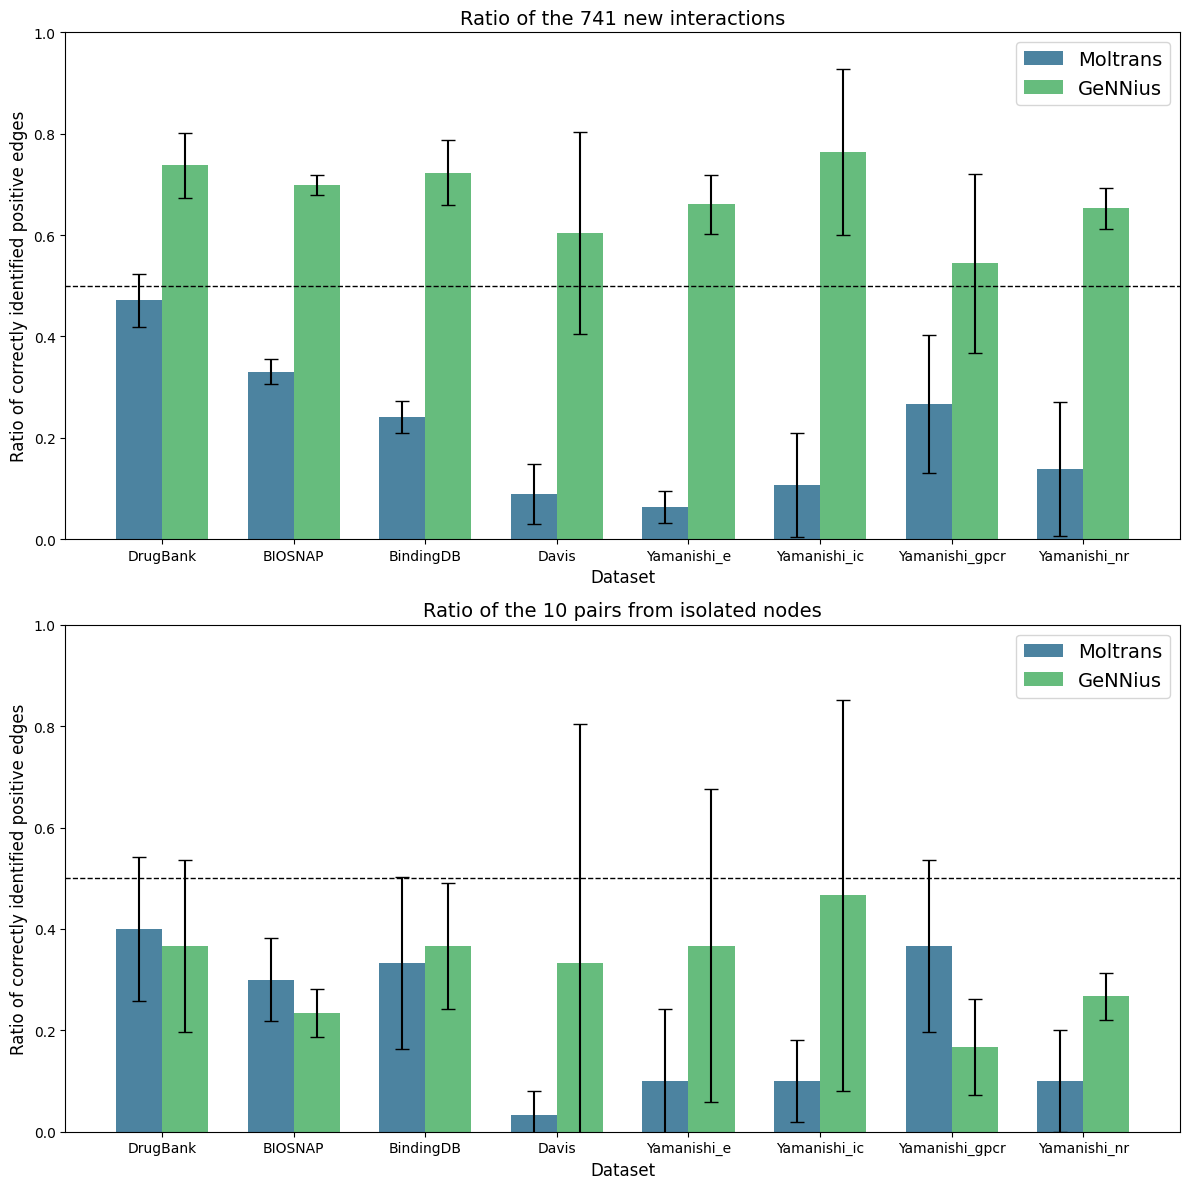

In [4]:
import numpy as np
import matplotlib.pyplot as plt

df_moltrans = pd.read_pickle('./data/df_results_moltrans.pkl')
df_gennius = pd.read_pickle('./data/df_results_GeNNius.pkl')

# define colors for models
moltrans_color = '#004e78'
gennius_color = '#25a046'


# Create a figure and axes for two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))  # 2 rows, 1 column

# Define bar width
bar_width = 0.35

# Define X-axis positions for the bars based on string names
datasets = df_moltrans['Dataset']  

# Define X-axis positions for the bars (shift bars for second model)
index = np.arange(len(df_moltrans['Dataset']))

# First subplot (Mean Accuracy for both models)
ax1.bar(index, df_moltrans['ACC_Mean'], yerr=df_moltrans['ACC_Std'], capsize=5, color=moltrans_color, alpha=0.7, width=bar_width, label='Moltrans')
ax1.bar(index + bar_width, df_gennius['ACC_Mean'], yerr=df_gennius['ACC_Std'], capsize=5, color=gennius_color, alpha=0.7, width=bar_width, label='GeNNius')

# Add horizontal line at y=0.5
ax1.axhline(y=0.5, color='black', linestyle='--', linewidth=1.)

# Set y-axis limits
ax1.set_ylim(0., 1.)

# Set x-ticks to be the dataset string names
ax1.set_xticks(index + bar_width / 2)  # Center the ticks between the bars
ax1.set_xticklabels(datasets)  # Rotate for better readability


# Set axis labels and title
ax1.set_xlabel('Dataset', fontsize=12)
ax1.set_ylabel('Ratio of correctly identified positive edges', fontsize=12)
ax1.set_title('Ratio of the 741 new interactions', fontsize=14)

# Add legend
ax1.legend(fontsize=14)

# Second subplot (Isolated nodes)
ax2.bar(index, df_moltrans['ACC_isol_Mean'], yerr=df_moltrans['ACC_isol_Std'], capsize=5, color=moltrans_color, alpha=0.7, width=bar_width, label='Moltrans')
ax2.bar(index + bar_width, df_gennius['ACC_isol_Mean'], yerr=df_gennius['ACC_isol_Std'], capsize=5, color=gennius_color, alpha=0.7, width=bar_width, label='GeNNius')

# Add horizontal line at y=0.5
ax2.axhline(y=0.5, color='black', linestyle='--', linewidth=1.)

# Set y-axis limits
ax2.set_ylim(0., 1.)

# Set x-ticks to be the dataset string names
ax2.set_xticks(index + bar_width / 2)  # Center the ticks between the bars
ax2.set_xticklabels(datasets)  # Rotate for better readability


# Set axis labels and title
ax2.set_xlabel('Dataset', fontsize=12)
ax2.set_ylabel('Ratio of correctly identified positive edges', fontsize=12)
ax2.set_title('Ratio of the 10 pairs from isolated nodes', fontsize=14)

# Add legend
ax2.legend(fontsize=14)

# Adjust layout
plt.tight_layout()

# Display 
plt.show()